#Nama : Laksmi Dyah Nurlita
#NIM : 21110023
#Kelas : S1SD02-A

**1. Visualisasi jalur dari Kota Purwokerto ke Kota Yogya**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

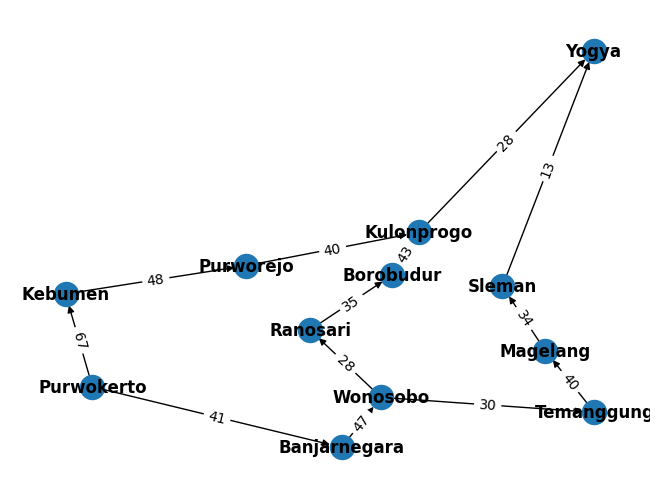

In [ ]:
#Mencari fungsi untuk menemukan jalur dari titik awal hingga titik akhir atau tujuan
def cari(daftar_busur, awal, akhir, jalur = []):
  jalur = jalur + [awal]
  if awal == akhir:
    return[jalur]
  if awal not in daftar_busur:
    return[]
  semua_jalur = []
  for a in daftar_busur[awal]:
    if a not in jalur:
      jalur2 = cari(daftar_busur, a, akhir, jalur)
      for baru in jalur2:
        semua_jalur.append(baru)
  return semua_jalur

#Definisikan jalur
daftar_busur=[('Purwokerto', 'Kebumen', 67),('Kebumen', 'Purworejo', 48),('Purworejo', 'Kulonprogo', 40),
              ('Kulonprogo', 'Yogya', 28),('Purwokerto', 'Banjarnegara', 41),('Banjarnegara', 'Wonosobo', 47),
              ('Wonosobo', 'Temanggung', 30),('Temanggung', 'Magelang', 40),('Magelang', 'Sleman', 34),('Sleman', 'Yogya', 13),
              ('Wonosobo', 'Ranosari', 28),('Ranosari', 'Borobudur', 35),('Borobudur', 'Kulonprogo', 43)]

#Membuat graph Jalur Kota Purwokerto ke Kota
L = nx.DiGraph()
path_edges =[]
L.add_weighted_edges_from(daftar_busur)
pos = nx.spring_layout(L)
nx.draw(L, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(L, pos, edge_labels={(u, v): d['weight'] for u, v, d in L.edges(data=True)})
nx.draw_networkx_edges(L, pos, edgelist = path_edges, edge_color='r', width = 2)
plt.show()

**2. Membuat program menemukan jalur terpendek dari Kota Purwokerto ke Kota Yogya dan visualisasinya**

Jalur Terpendek Purwokerto - Yogya:  ['Purwokerto', 'Kebumen', 'Purworejo', 'Kulonprogo', 'Yogya']
Jarak yang Ditempuh:  183 Km


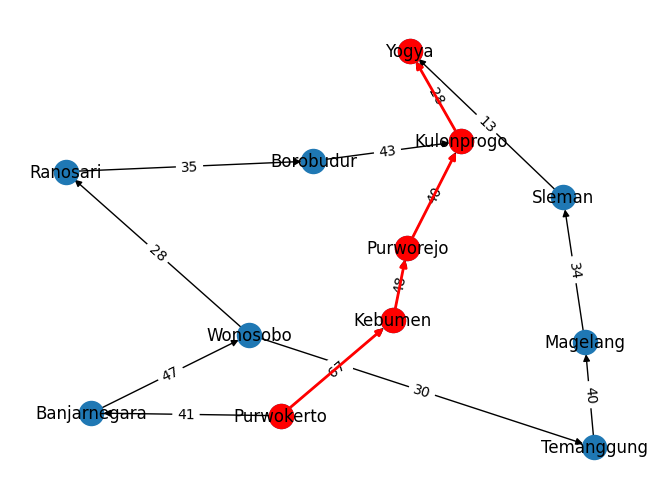

In [ ]:
#Menemukan jalur terpendek Kota Purwokerto ke Kota Yogya
jarak_terpendek = nx.shortest_path(L, 'Purwokerto', 'Yogya')
jarak_tempuh = nx.dijkstra_path_length(L, 'Purwokerto', 'Yogya')
print('Jalur Terpendek Purwokerto - Yogya: ' , jarak_terpendek)
print('Jarak yang Ditempuh: ', jarak_tempuh, 'Km')

#Visualisasi jarak terpendeng dengan warna merah
pos = nx.spring_layout(L)
nx.draw(L, pos, with_labels=True)
label = nx.get_edge_attributes(L,'weight')
nx.draw_networkx_edge_labels(L, pos, edge_labels=label)
path_edges = list(zip(jarak_terpendek, jarak_terpendek[1:]))
nx.draw_networkx_nodes(L, pos, nodelist = jarak_terpendek, node_color='r')
nx.draw_networkx_edges(L, pos, edgelist=path_edges, edge_color='r', width=2)
plt.show()